<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/K_Means_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [17]:
class KMeans:
  def __init__(self,n_clusters=2,max_iter=100):
    self.n_clusters=n_clusters
    self.max_iter=max_iter
    self.centriods=None
    self.inertia=None

  def assign_clusters(self, X):
    cluster_group=[]
    for  row in X:
      distance=[np.sqrt(np.sum((row-centriod)**2)) for centriod in self.centriods]
      cluster_group.append(np.argmin(distance))
    return np.array(cluster_group)

  def move_centriods(self,X,cluster_group):
    new_centriods=[]
    for i in range(self.n_clusters):
      points = X[cluster_group==i]
      if len(points)>0:
        new_centriods.append(points.mean(axis=0))
      else:
        new_centriods.append(self.centriods[i])
    return np.array(new_centriods)
  def fit_predict(self, X):
    random_index=random.sample(range(0,X.shape[0]),self.n_clusters)
    self.centriods=X[random_index]

    for _ in range(self.max_iter):
      cluster_group = self.assign_clusters(X)
      old_centriods=self.centriods.copy()
      self.centriods=self.move_centriods(X,cluster_group)
      if np.allclose(old_centriods,self.centriods):
        break
    self.inertia=sum(np.sum((X[cluster_group==i]-self.centriods[i])**2) for i in range(self.n_clusters))

    return cluster_group

  def elbow_method(self, X,max_k=10):
    inertias=[]
    for k in range(1,max_k+1):
      kmeans=KMeans(n_clusters=k,max_iter=self.max_iter)
      kmeans.fit_predict(X)
      inertias.append(kmeans.inertia)

    plt.figure(figsize=(8,5))
    plt.plot(range(1,max_k+1),inertias,marker='o',linestyle='--')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()
    return inertias

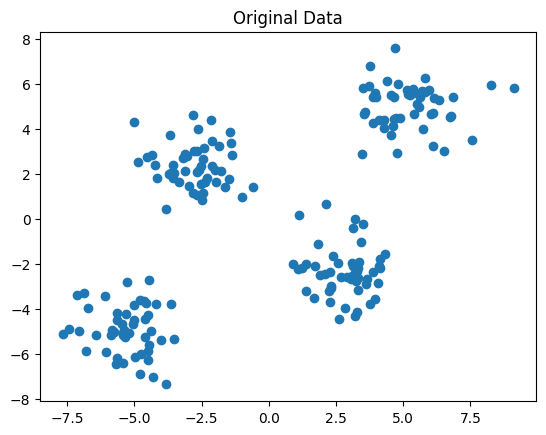

In [18]:
from sklearn.datasets import make_blobs

centriods = [(-5, -5), (5, 5), (-2.5, 2.5), (2.5, -2.5)]

cluster_std = [1, 1, 1, 1]

X, y = make_blobs(n_samples=200, cluster_std=cluster_std, centers=centriods, n_features=2, random_state=2)

plt.scatter(X[:, 0], X[:, 1])
plt.title("Original Data")
plt.show()

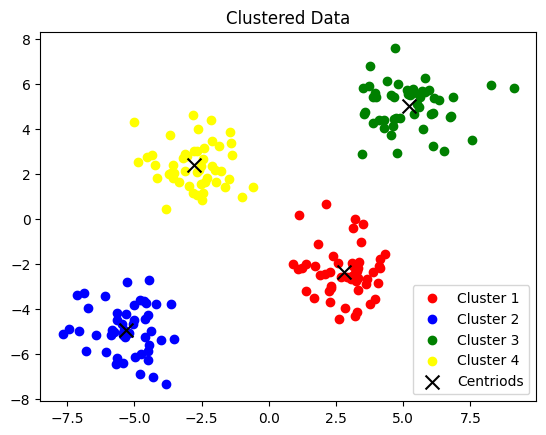

In [19]:
km = KMeans(n_clusters=4, max_iter=500)
y_means = km.fit_predict(X)

plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], color='red', label='Cluster 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], color='blue', label='Cluster 2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], color='green', label='Cluster 3')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], color='yellow', label='Cluster 4')
plt.scatter(km.centriods[:, 0], km.centriods[:, 1], color='black', marker='x', s=100, label='Centriods')
plt.title("Clustered Data")
plt.legend()
plt.show()

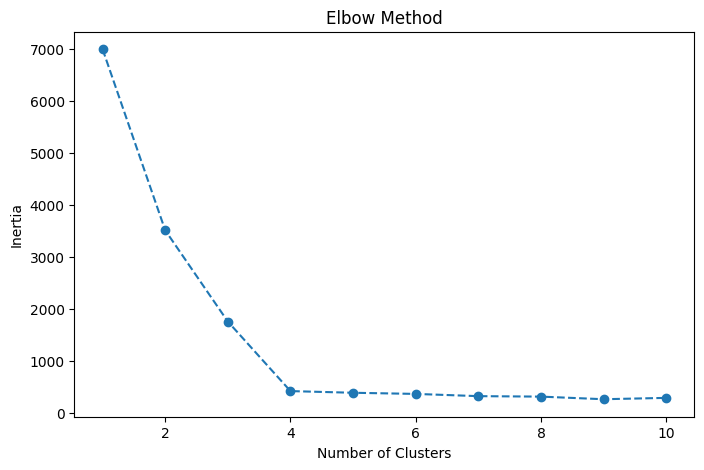

[6994.7054474170445,
 3510.9232150666094,
 1755.529487580355,
 417.8509516537456,
 385.6525469725751,
 363.60276330683337,
 320.62524835112094,
 311.56098121344553,
 261.429377007744,
 287.35049198754837]

In [20]:
km.elbow_method(X, max_k=10)